In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
from subprocess import check_output
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("kc_house_data.csv",engine="python")

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

>- let's check P-value and remove the insignificant variables
>- Initially let's take all variables.

In [5]:
X = dataset[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = dataset['price']

In [6]:
X 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [8]:
X.shape 

(21613, 18)

In [9]:
y.shape 


(21613,)

In [10]:
X = dataset['grade'].values
y = dataset.price.values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train

array([7, 8, 8, ..., 9, 8, 7], dtype=int64)

In [13]:
y_train 

array([495000., 635000., 382500., ..., 431000., 411000., 699900.])

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly_reg = PolynomialFeatures(degree=4)

In [16]:
X

array([7, 7, 6, ..., 7, 8, 7], dtype=int64)

In [17]:
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

In [18]:
X_poly[:1]

array([[1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [19]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)

In [20]:
X_train_p

array([[1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       ...,
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lin_reg = LinearRegression()

In [23]:
lin_reg.fit(X_train_p, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_preds_p = lin_reg.predict(X_test_p)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('mean_squared_error: ',mean_squared_error(y_test_p, y_preds_p),
     '\nr2_score: ',r2_score(y_test_p, y_preds_p)
     )

mean_squared_error:  53502059289.96428 
r2_score:  0.5501165606785698


In [26]:
y_preds_p2 = lin_reg.predict(X_poly)

Text(0, 0.5, 'Price')

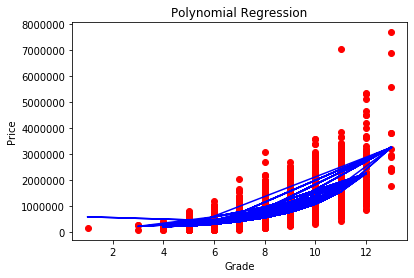

In [27]:
plt.scatter(X_poly[:,1], y, color = 'red')
plt.plot(X_poly[:,1], y_preds_p2, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Grade')
plt.ylabel('Price')

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [29]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Fitting Multiple Linear Regression to the Training set**

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_p, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Predicting the Test set results
y_pred = regressor.predict(X_test_p)

In [32]:
inter = regressor.intercept_
coeffs = regressor.coef_

In [33]:
dataset.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
933,8594400370,20150205T000000,299900.0,3,2.25,1560,35026,1.0,0,0,...,7,1290,270,1985,0,98092,47.3023,-122.069,1660,35160


In [34]:
X_train_p[:3]

array([[1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03]])

In [35]:
import seaborn as sns

In [36]:
import statsmodels.api as sm
X_1=sm.add_constant(X_train_p)
ols_regr = sm.OLS(endog =  y_train_p, exog = X_1).fit()

In [37]:
col_names = ['const']+pd.get_dummies(dataset.drop('price', axis=1)).columns.tolist()

In [38]:
col_names

['const',
 'id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date_20140502T000000',
 'date_20140503T000000',
 'date_20140504T000000',
 'date_20140505T000000',
 'date_20140506T000000',
 'date_20140507T000000',
 'date_20140508T000000',
 'date_20140509T000000',
 'date_20140510T000000',
 'date_20140511T000000',
 'date_20140512T000000',
 'date_20140513T000000',
 'date_20140514T000000',
 'date_20140515T000000',
 'date_20140516T000000',
 'date_20140517T000000',
 'date_20140518T000000',
 'date_20140519T000000',
 'date_20140520T000000',
 'date_20140521T000000',
 'date_20140522T000000',
 'date_20140523T000000',
 'date_20140524T000000',
 'date_20140525T000000',
 'date_20140526T000000',
 'date_20140527T000000',
 'date_20140528T000000',
 'date_20140529T000000',
 'date_20140530T000000',
 'date_20140531T00

In [39]:
ols_regr.params

array([ 1.04006618e+06, -5.88735544e+05,  1.42272771e+05, -1.44905028e+04,
        6.18497560e+02])

In [40]:
b0 = ols_regr.params[0]
k1 = ols_regr.params[1]
k2 = ols_regr.params[2]
k3 = ols_regr.params[3]

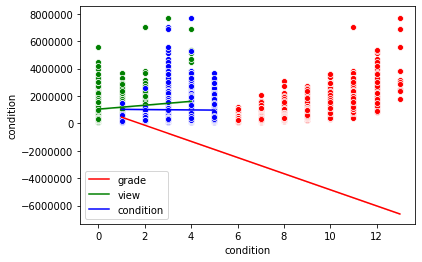

In [41]:
sns.scatterplot(x = dataset['grade'], y=dataset['price'], color='red')
sns.scatterplot(x = dataset['view'], y=dataset['price'], color='green')
sns.scatterplot(x = dataset['condition'], y=dataset['price'], color='blue')
sns.lineplot(x=dataset['grade'],y=(dataset['grade'] * k1) + b0, color='red')
sns.lineplot(x=dataset['view'],y=(dataset['view'] * k2) + b0, color='green')
sns.lineplot(x=dataset['condition'],y=(dataset['condition'] * k3) + b0, color='blue')
plt.legend(['grade','view','condition'])

In [42]:
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred))

mean_squared_error:  53502059289.96428 
r2_score:  0.5501165606785698


<center> <img src="https://www.haghish.com/statistics/stata-blog/stata-programming/images/adjr2.png " alt="drawing" width="500"/> </center>

In [43]:
def adj_r2(r2score, train):
    adj_r2 = (1 - (1 - r2score) * ((train.shape[0] - 1) / 
          (train.shape[0] - train.shape[1] - 1)))
    return adj_r2

In [44]:
adj_r2(r2_score(y_test_p, y_pred), X_train_p)

0.5499864161983219

In [45]:
X_new = pd.get_dummies(dataset.drop('price', axis=1)).values

In [46]:
X_opt = X_new
X_opt[:3]

array([[7.12930052e+09, 3.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.41410019e+09, 3.00000000e+00, 2.25000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.63150040e+09, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [47]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [48]:
regressor_OLS.summary(xname=pd.get_dummies(dataset.drop('price', axis=1)).columns.tolist(), yname='price')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     132.1
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:22:32   Log-Likelihood:            -2.9433e+05
No. Observations:               21613   AIC:                         5.894e+05
Df Residuals:                   21224   BIC:                         5.925e+05
Df Model:                         388                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
id                    -1.35e-06   4.85e-07     -2.784      0.005    -2.3e-06   -3.99e-07
bedrooms             -3.594e+04   1900.981    -18.907      0.000   -3.97e+04   -3.22e+04
bathrooms             4.156e+04   3274.535     12.691      0.000    3.51e+04     4.8e+04
sqft_living            110.3406      8.056     13.696      0.000      94.550     126.131
sqft_lot                 0.1253      0.048      2.592      0.010       0.031       0.220
floors                7018.6583   3619.247      1.939      0.052     -75.340    1.41e+04
waterfront            5.803e+05   1.74e+04     33.308      0.000    5.46e+05    6.14e+05
view                  5.335e+04   2151.262     24.799      0.000    4.91e+04    5.76e+04
condition             2.783e+04   2366.142     11.761      0.000    2.32e+04    3.25e+04
grade                 9.635e+04   2164.737     44.510      0.000    9.21e+04    1.01e+05
sqft_above              71.0561      8.083      8.791      0.000      55.213      86.899
sqft_basement           39.4149      8.194      4.811      0.000      23.355      55.475
yr_built             -2619.5279     73.044    -35.862      0.000   -2762.700   -2476.356
yr_renovated            21.1282      3.674      5.750      0.000      13.926      28.330
zipcode               -581.3022     33.097    -17.564      0.000    -646.174    -516.430
lat                   6.012e+05   1.08e+04     55.707      0.000     5.8e+05    6.22e+05
long                 -2.121e+05   1.32e+04    -16.064      0.000   -2.38e+05   -1.86e+05
sqft_living15           21.0601      3.463      6.082      0.000      14.273      27.847
sqft_lot15              -0.4057      0.074     -5.484      0.000      -0.551      -0.261
date_20140502T000000  6.941e+06   2.94e+06      2.359      0.018    1.17e+06    1.27e+07
date_20140503T000000  7.115e+06   2.94e+06      2.417      0.016    1.34e+06    1.29e+07
date_20140504T000000  6.876e+06   2.94e+06      2.336      0.020    1.11e+06    1.26e+07
date_20140505T000000  6.955e+06   2.94e+06      2.364      0.018    1.19e+06    1.27e+07
date_20140506T000000  6.941e+06   2.94e+06      2.359      0.018    1.17e+06    1.27e+07
date_20140507T000000  6.955e+06   2.94e+06      2.364      0.018    1.19e+06    1.27e+07
date_20140508T000000  6.989e+06   2.94e+06      2.375      0.018    1.22e+06    1.28e+07
date_20140509T000000  6.926e+06   2.94e+06      2.354      0.019    1.16e+06    1.27e+07
date_20140510T000000  6.974e+06   2.94e+06      2.369      0.018     1.2e+06    1.27e+07
date_20140511T000000  7.006e+06   2.95e+06      2.378      0.017    1.23e+06    1.28e+07
date_20140512T000000  6.963e+06   2.94e+06      2.366      0.018     1.2e+06    1.27e+07
date_20140513T000000  6.987e+06   2.94e+06      2.375      0.018    1.22e+06    1.28e+07
date_20140514T000000  6.949e+06   2.94e+06      2.362    

In [49]:
X_new = pd.get_dummies(dataset.drop(['price','grade'], axis=1)).values

In [50]:
X_opt = X_new
X_opt[:3]

array([[7.12930052e+09, 3.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.41410019e+09, 3.00000000e+00, 2.25000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.63150040e+09, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [51]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [52]:
regressor_OLS.summary(xname=pd.get_dummies(dataset.drop(['price','grade'], axis=1)).columns.tolist(), yname='price')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:22:33   Log-Likelihood:            -2.9529e+05
No. Observations:               21613   AIC:                         5.914e+05
Df Residuals:                   21225   BIC:                         5.945e+05
Df Model:                         387                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
id                   -8.849e-07   5.07e-07     -1.746      0.081   -1.88e-06    1.08e-07
bedrooms             -4.679e+04   1971.282    -23.735      0.000   -5.07e+04   -4.29e+04
bathrooms             5.298e+04   3413.344     15.522      0.000    4.63e+04    5.97e+04
sqft_living            168.0808     19.071      8.814      0.000     130.701     205.461
sqft_lot                 0.1728      0.051      3.421      0.001       0.074       0.272
floors                2.113e+04   3769.771      5.604      0.000    1.37e+04    2.85e+04
waterfront            5.608e+05   1.82e+04     30.794      0.000    5.25e+05    5.96e+05
view                   6.13e+04   2241.611     27.346      0.000    5.69e+04    6.57e+04
condition              3.06e+04   2473.199     12.372      0.000    2.58e+04    3.54e+04
sqft_above              77.8139     19.063      4.082      0.000      40.449     115.179
sqft_basement           18.4201     19.127      0.963      0.336     -19.071      55.911
yr_built             -1896.9647     74.465    -25.474      0.000   -2042.922   -1751.007
yr_renovated            26.7862      3.839      6.977      0.000      19.261      34.312
zipcode               -634.8421     34.583    -18.357      0.000    -702.628    -567.056
lat                   6.804e+05   1.11e+04     61.136      0.000    6.59e+05    7.02e+05
long                  -3.06e+05   1.36e+04    -22.445      0.000   -3.33e+05   -2.79e+05
sqft_living15           64.9593      3.471     18.717      0.000      58.156      71.762
sqft_lot15              -0.4923      0.077     -6.367      0.000      -0.644      -0.341
date_20140502T000000  -3.95e+06   3.07e+06     -1.288      0.198   -9.96e+06    2.06e+06
date_20140503T000000 -3.811e+06   3.07e+06     -1.242      0.214   -9.82e+06     2.2e+06
date_20140504T000000 -3.988e+06   3.07e+06     -1.300      0.194      -1e+07    2.02e+06
date_20140505T000000 -3.948e+06   3.07e+06     -1.288      0.198   -9.96e+06    2.06e+06
date_20140506T000000 -3.966e+06   3.07e+06     -1.293      0.196   -9.98e+06    2.04e+06
date_20140507T000000 -3.945e+06   3.07e+06     -1.287      0.198   -9.95e+06    2.06e+06
date_20140508T000000 -3.914e+06   3.07e+06     -1.277      0.202   -9.92e+06     2.1e+06
date_20140509T000000  -3.97e+06   3.07e+06     -1.295      0.195   -9.98e+06    2.04e+06
date_20140510T000000 -3.922e+06   3.07e+06     -1.279      0.201   -9.93e+06    2.09e+06
date_20140511T000000 -3.842e+06   3.07e+06     -1.252      0.211   -9.86e+06    2.18e+06
date_20140512T000000 -3.939e+06   3.07e+06     -1.285      0.199   -9.95e+06    2.07e+06
date_20140513T000000  -3.92e+06   3.07e+06     -1.279      0.201   -9.93e+06    2.09e+06
date_20140514T000000 -3.945e+06   3.07e+06     -1.287      0.198   -9.95e+06    2.06e+06
date_20140515T000000 -3.955e+06   3.07e+06     -1.290    

In [53]:
X_new = pd.get_dummies(dataset.drop(['price','grade','view'], axis=1)).values

In [54]:
X_opt = X_new
X_opt[:3]

array([[7.12930052e+09, 3.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.41410019e+09, 3.00000000e+00, 2.25000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.63150040e+09, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [55]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [56]:
regressor_OLS.summary(xname=pd.get_dummies(dataset.drop(['price','grade','view'], axis=1)).columns.tolist(), yname='price')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     111.0
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:22:35   Log-Likelihood:            -2.9567e+05
No. Observations:               21613   AIC:                         5.921e+05
Df Residuals:                   21226   BIC:                         5.952e+05
Df Model:                         386                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
id                   -4.915e-07   5.15e-07     -0.954      0.340    -1.5e-06    5.19e-07
bedrooms             -5.138e+04   1998.358    -25.713      0.000   -5.53e+04   -4.75e+04
bathrooms             5.535e+04   3471.750     15.944      0.000    4.85e+04    6.22e+04
sqft_living            160.8372     14.590     11.024      0.000     132.240     189.435
sqft_lot                 0.2223      0.051      4.327      0.000       0.122       0.323
floors                2.442e+04   3833.555      6.370      0.000    1.69e+04    3.19e+04
waterfront            7.471e+05   1.72e+04     43.484      0.000    7.13e+05    7.81e+05
condition               3.2e+04   2515.788     12.720      0.000    2.71e+04    3.69e+04
sqft_above              87.0683     14.589      5.968      0.000      58.472     115.665
sqft_basement           46.7879     14.661      3.191      0.001      18.051      75.525
yr_built             -2028.2105     75.606    -26.826      0.000   -2176.405   -1880.016
yr_renovated            30.4366      3.904      7.796      0.000      22.784      38.089
zipcode               -552.7298     35.053    -15.768      0.000    -621.437    -484.022
lat                   6.567e+05   1.13e+04     58.172      0.000    6.35e+05    6.79e+05
long                 -3.286e+05   1.38e+04    -23.740      0.000   -3.56e+05   -3.02e+05
sqft_living15           82.8641      3.468     23.895      0.000      76.067      89.661
sqft_lot15              -0.4814      0.079     -6.120      0.000      -0.636      -0.327
date_20140502T000000 -1.342e+07    3.1e+06     -4.331      0.000   -1.95e+07   -7.35e+06
date_20140503T000000 -1.329e+07    3.1e+06     -4.286      0.000   -1.94e+07   -7.21e+06
date_20140504T000000 -1.347e+07    3.1e+06     -4.343      0.000   -1.95e+07   -7.39e+06
date_20140505T000000 -1.343e+07    3.1e+06     -4.332      0.000   -1.95e+07   -7.35e+06
date_20140506T000000 -1.345e+07    3.1e+06     -4.338      0.000   -1.95e+07   -7.37e+06
date_20140507T000000 -1.342e+07    3.1e+06     -4.331      0.000   -1.95e+07   -7.35e+06
date_20140508T000000 -1.339e+07    3.1e+06     -4.321      0.000   -1.95e+07   -7.32e+06
date_20140509T000000 -1.344e+07    3.1e+06     -4.338      0.000   -1.95e+07   -7.37e+06
date_20140510T000000 -1.342e+07    3.1e+06     -4.327      0.000   -1.95e+07   -7.34e+06
date_20140511T000000 -1.333e+07    3.1e+06     -4.296      0.000   -1.94e+07   -7.25e+06
date_20140512T000000 -1.342e+07    3.1e+06     -4.331      0.000   -1.95e+07   -7.35e+06
date_20140513T000000  -1.34e+07    3.1e+06     -4.324      0.000   -1.95e+07   -7.33e+06
date_20140514T000000 -1.343e+07    3.1e+06     -4.332      0.000   -1.95e+07   -7.35e+06
date_20140515T000000 -1.343e+07    3.1e+06     -4.334      0.000   -1.95e+07   -7.36e+06
date_20140516T000000 -1.342e+07    3.1e+06     -4.331    

In [57]:
X_new = pd.get_dummies(dataset.drop(['price','grade'], axis=1)).values

In [58]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [59]:
regressor_new = LinearRegression()

In [60]:
regressor_new.fit(X_train_new, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_preds_new = regressor_new.predict(X_test_new)

In [62]:
r2_score(y_preds_new, y_test_new)

0.5182725808240218

In [63]:
adj_r2(r2_score(y_preds_new, y_test_new), X_train_new)

0.5071551363907043

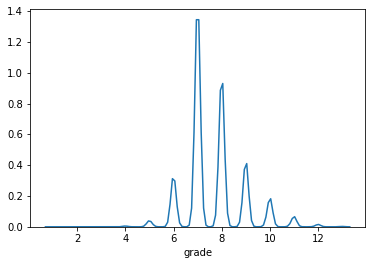

In [64]:
sns.distplot(dataset['grade'], hist = False)

In [87]:
X = dataset[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [99]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [107]:
X.iloc[:,7]

0        3
1        3
2        3
3        5
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: condition, Length: 21613, dtype: int64

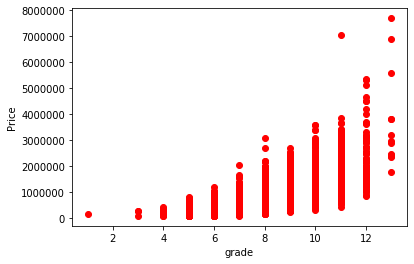

In [103]:
plt.scatter(X.iloc[:,8],y, color='red')
plt.xlabel('grade')
plt.ylabel('Price')
plt.show()

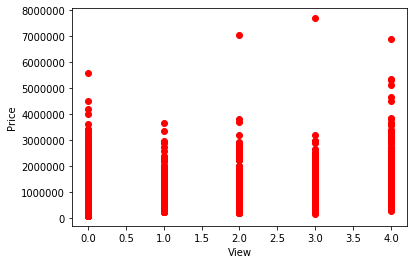

In [109]:
plt.scatter(X.iloc[:,6],y, color='red')
plt.xlabel('View')
plt.ylabel('Price')
plt.show()

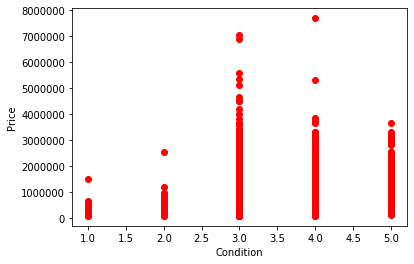

In [110]:
plt.scatter(X.iloc[:,7],y, color='red')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

In [122]:
regressor.coef_

array([      0.        , -588735.54438232,  142272.77137515,
        -14490.50277889,     618.49756021])

In [112]:
regressor.intercept_

1040066.1825747493

In [118]:
X.iloc[:4,8:9]

,grade
0,7
1,7
2,6
3,7


In [127]:
x_min = np.min(X.iloc[:,8:9])
x_max = np.max(X.iloc[:,8:9])

In [128]:
x_set = np.linspace(x_min, x_max, 1000)

In [129]:
regressor.coef_[0]

0.0

In [130]:
regressor.coef_[1]

-588735.5443823173

In [131]:
y_set=regressor.intercept_ + x_set*regressor.coef_[1]

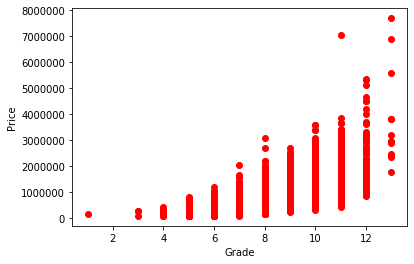

In [133]:
plt.scatter(X.iloc[:,8:9],y, color='red')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

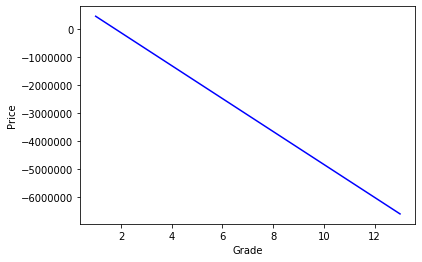

In [134]:
plt.plot(x_set, y_set, color='blue')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

In [135]:
y_set

array([[ 4.51330638e+05],
       [ 4.44258740e+05],
       [ 4.37186841e+05],
       [ 4.30114943e+05],
       [ 4.23043044e+05],
       [ 4.15971146e+05],
       [ 4.08899248e+05],
       [ 4.01827349e+05],
       [ 3.94755451e+05],
       [ 3.87683552e+05],
       [ 3.80611654e+05],
       [ 3.73539755e+05],
       [ 3.66467857e+05],
       [ 3.59395959e+05],
       [ 3.52324060e+05],
       [ 3.45252162e+05],
       [ 3.38180263e+05],
       [ 3.31108365e+05],
       [ 3.24036466e+05],
       [ 3.16964568e+05],
       [ 3.09892670e+05],
       [ 3.02820771e+05],
       [ 2.95748873e+05],
       [ 2.88676974e+05],
       [ 2.81605076e+05],
       [ 2.74533177e+05],
       [ 2.67461279e+05],
       [ 2.60389381e+05],
       [ 2.53317482e+05],
       [ 2.46245584e+05],
       [ 2.39173685e+05],
       [ 2.32101787e+05],
       [ 2.25029888e+05],
       [ 2.17957990e+05],
       [ 2.10886092e+05],
       [ 2.03814193e+05],
       [ 1.96742295e+05],
       [ 1.89670396e+05],
       [ 1.8

In [136]:
regressor.singular_

array([3.78845497e+05, 3.54117644e+03, 5.14238417e+01, 1.37511814e+00,
       0.00000000e+00])